In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats
import pylab
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math

In [3]:
file_path = Path('data/stock_prices.csv')

In [5]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [11]:
df.dtypes

symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [13]:
df.value_counts()

symbol  date        open   high   low     close  volume 
A       2014-01-02  57.10  57.10  56.150  56.21  1916160    1
NLSN    2014-05-15  47.17  47.25  45.860  46.44  1708811    1
        2014-06-25  48.15  48.59  48.100  48.23  1070944    1
        2014-06-24  48.03  48.55  48.000  48.30  2042589    1
        2014-06-23  48.17  48.46  47.370  48.30  1669288    1
                                                           ..
ETFC    2017-03-29  34.09  34.38  33.930  34.31  1814072    1
        2017-03-28  33.35  34.53  33.310  34.25  2803191    1
        2017-03-27  32.78  33.61  32.250  33.55  2271261    1
        2017-03-24  33.82  33.98  33.365  33.64  1917217    1
ZTS     2017-12-29  72.55  72.76  72.040  72.04  1704122    1
Name: count, Length: 497461, dtype: int64

In [15]:
df.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [17]:
df.columns.to_list()

['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']

In [19]:
df.isna()

,symbol,date,open,high,low,close,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
497467,False,False,False,False,False,False,False
497468,False,False,False,False,False,False,False
497469,False,False,False,False,False,False,False
497470,False,False,False,False,False,False,False


In [25]:
df.isna().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [23]:
df.dropna(inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497461 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497461 non-null  object 
 1   date    497461 non-null  object 
 2   open    497461 non-null  float64
 3   high    497461 non-null  float64
 4   low     497461 non-null  float64
 5   close   497461 non-null  float64
 6   volume  497461 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 30.4+ MB


In [29]:
df.date.info()

<class 'pandas.core.series.Series'>
Index: 497461 entries, 0 to 497471
Series name: date
Non-Null Count   Dtype 
--------------   ----- 
497461 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [31]:
df.date.value_counts()

date
2017-12-29    505
2017-12-15    505
2017-12-05    505
2017-12-06    505
2017-12-08    505
             ... 
2014-02-24    483
2014-02-21    483
2014-02-20    483
2014-01-02    483
2014-06-10    482
Name: count, Length: 1007, dtype: int64

In [33]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [35]:
df_copy = df.copy()

<Axes: title={'center': 'Open Stock Price'}>

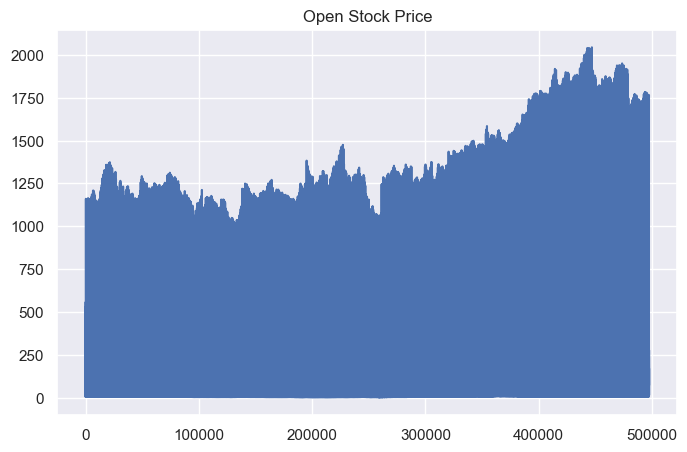

In [37]:
df.open.plot(figsize=(8, 5), title='Open Stock Price')

In [41]:
df.open.max()

2044.0

In [51]:
df.loc[df['open'].idxmax()]

symbol          PCLN
date      2017-08-08
open          2044.0
high         2067.99
low          2035.11
close         2049.0
volume        830572
Name: 446926, dtype: object

In [53]:
df.open.min()

1.62

In [55]:
df.loc[df['open'].idxmin()]

symbol           AMD
date      2015-07-28
open            1.62
high            1.77
low             1.62
close           1.77
volume      14614569
Name: 191891, dtype: object

In [57]:
df.date.min()

'2014-01-02'

In [61]:
df.loc[df['date'].idxmin()]

symbol           AAL
date      2014-01-02
open           25.07
high           25.82
low            25.06
close          25.36
volume       8998943
Name: 0, dtype: object

In [59]:
df.date.max()

'2017-12-29'

In [65]:
df.loc[df['date'].idxmax()]

symbol           AAL
date      2017-12-29
open           52.42
high           52.82
low            52.01
close          52.03
volume       2697096
Name: 496967, dtype: object

<Axes: title={'center': 'Close Stock Price'}>

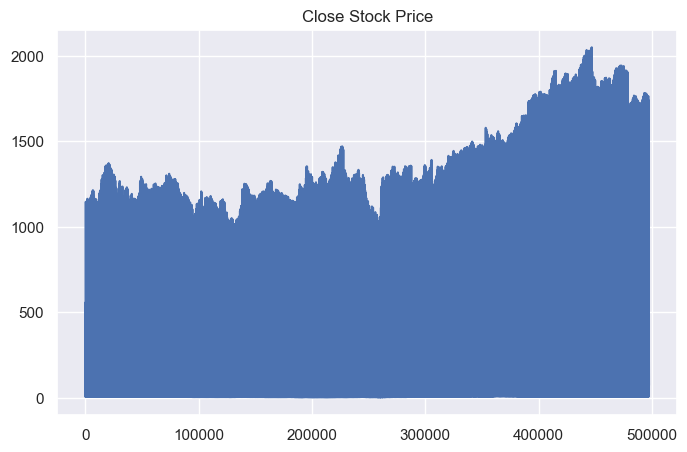

In [97]:
df.close.plot(figsize = (8, 5), title='Close Stock Price')

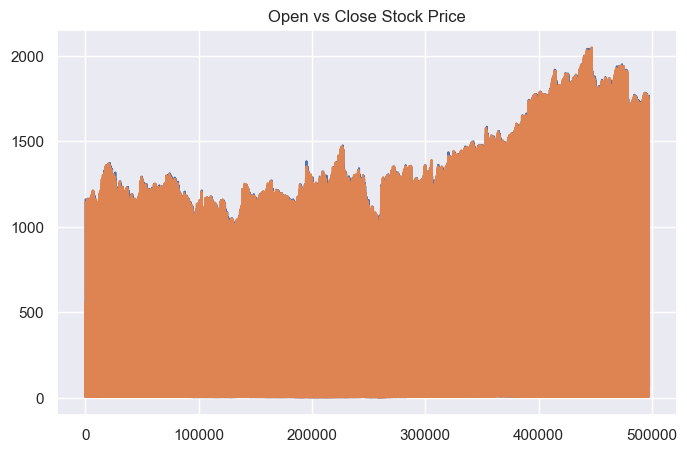

In [101]:
df.open.plot(figsize = (8, 5), title = 'Open Stock Price')
df.close.plot(figsize = (8, 5), title = 'Close Stock Price')
plt.title('Open vs Close Stock Price')
plt.show()

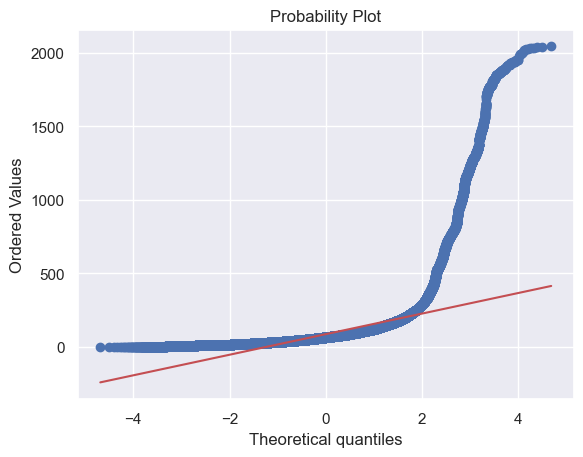

In [105]:
scipy.stats.probplot(df.open, plot=pylab)
plt.show()

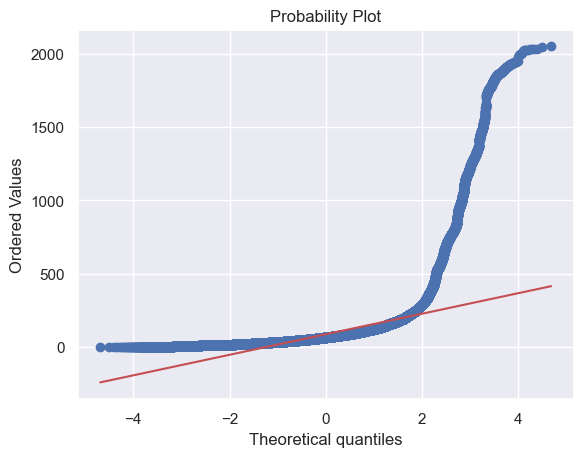

In [109]:
scipy.stats.probplot(df.close, plot=pylab)
plt.show()

In [69]:
df['date'] = pd.to_datetime(df.date)

In [91]:
df.dtypes

symbol     object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [73]:
df.date.describe()

count                           497461
mean     2016-01-06 17:16:56.524310016
min                2014-01-02 00:00:00
25%                2015-01-08 00:00:00
50%                2016-01-11 00:00:00
75%                2017-01-06 00:00:00
max                2017-12-29 00:00:00
Name: date, dtype: object

In [75]:
df.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       497462, 497463, 497464, 497465, 497466, 497467, 497468, 497469, 497470,
       497471],
      dtype='int64', length=497461)

In [77]:
df.set_index('date', inplace = True)

In [79]:
df.index

DatetimeIndex(['2014-01-02', '2014-01-02', '2014-01-02', '2014-01-02',
               '2014-01-02', '2014-01-02', '2014-01-02', '2014-01-02',
               '2014-01-02', '2014-01-02',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29'],
              dtype='datetime64[ns]', name='date', length=497461, freq=None)

In [87]:
df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391


In [106]:
size = int(len(df)*0.8)

In [108]:
df_train = df.iloc[:size]

In [110]:
df_test = df.iloc[size:]

In [144]:
df = df_train

In [114]:
df.tail()

,symbol,open,high,low,close,volume
date,,,,,,
2017-03-21,AMG,163.52,163.5200,158.445,159.29,455828
2017-03-21,AMP,131.28,131.2800,125.630,125.87,1507878
2017-03-21,AMT,116.55,118.5399,116.320,116.74,2853972
2017-03-21,AMZN,858.84,862.7950,841.310,843.20,4382852
2017-03-21,ANDV,84.48,84.5700,81.340,82.01,2097043


In [116]:
df_test.head()

,symbol,open,high,low,close,volume
date,,,,,,
2017-03-21,ANSS,107.98,108.11,106.205,106.42,436485
2017-03-21,ANTM,168.23,168.50,166.180,166.99,1529233
2017-03-21,AON,118.95,118.95,117.200,117.57,1143339
2017-03-21,AOS,52.25,52.39,50.860,50.96,896429
2017-03-21,APA,51.20,51.39,50.210,50.30,2830226


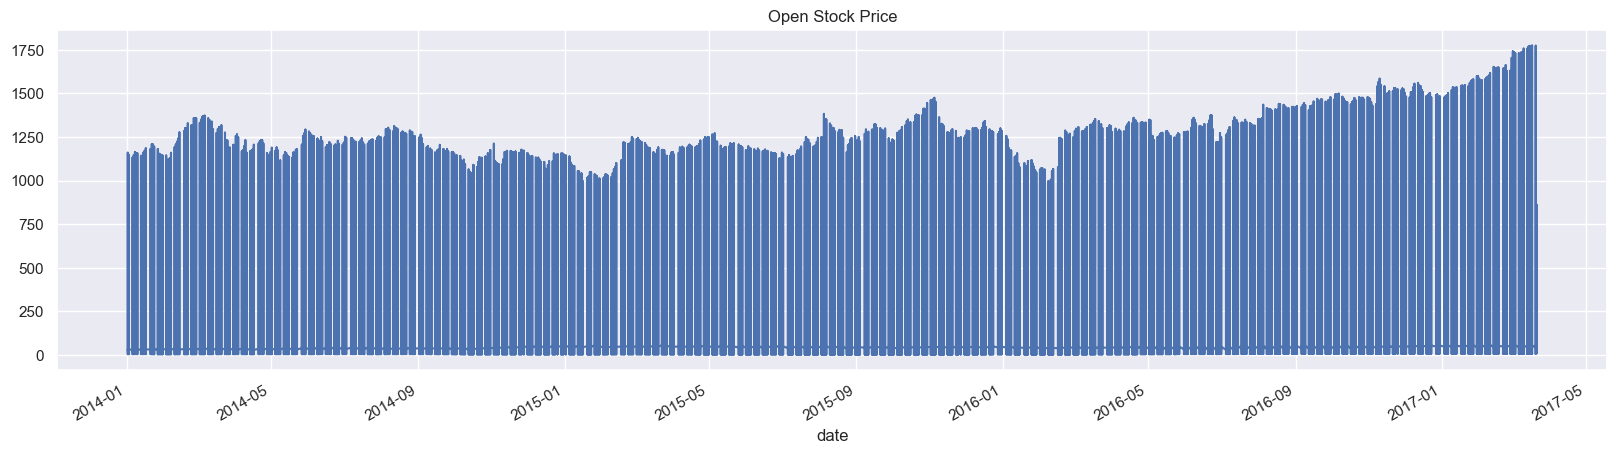

In [118]:
df.open.plot(figsize = (20, 5))
plt.title('Open Stock Price')
plt.show()

In [239]:
sts.adfuller(df.open)

(-2.447279796725739,
 0.12883408209136643,
 1,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 156.71592112963572)

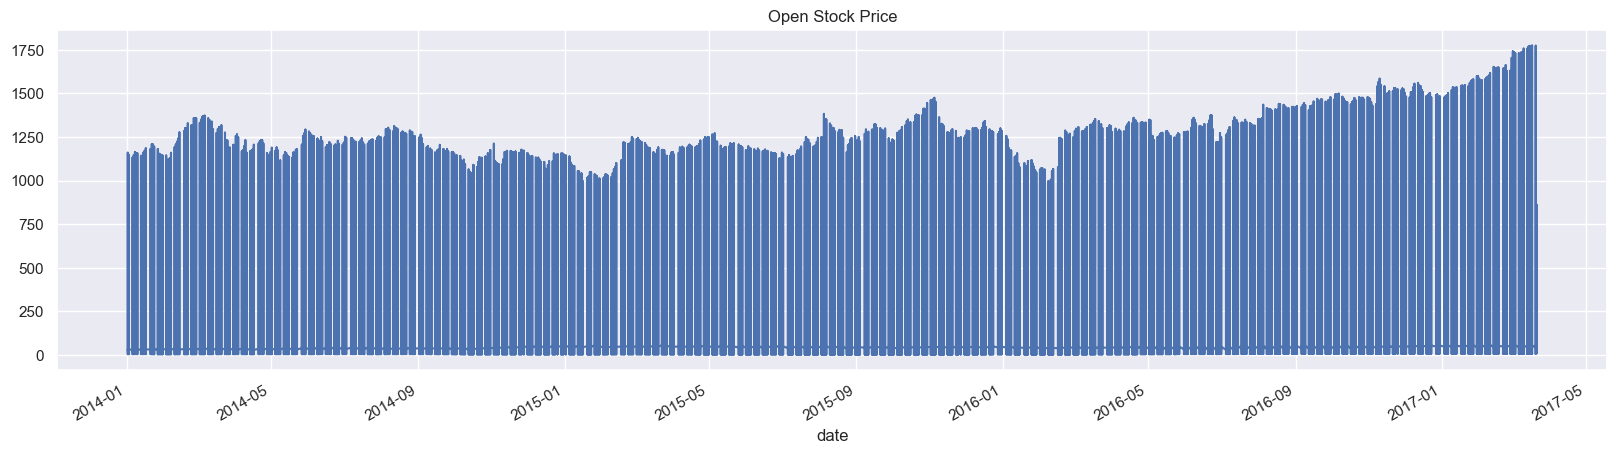

In [150]:
df.open.plot(figsize = (20, 5))
plt.title('Open Stock Price')
plt.show()

In [154]:
df = df.resample('ME').first()

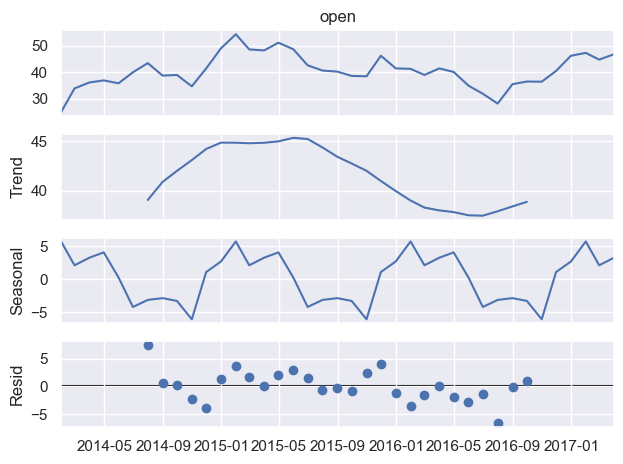

In [187]:
s_dec_additive = seasonal_decompose(df.open, model='additive')
s_dec_additive.plot()
plt.show()

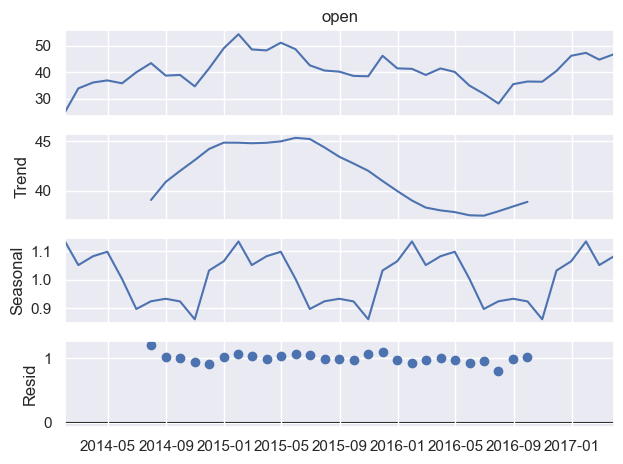

In [189]:
s_dec_multiplicative = seasonal_decompose(df.open, model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

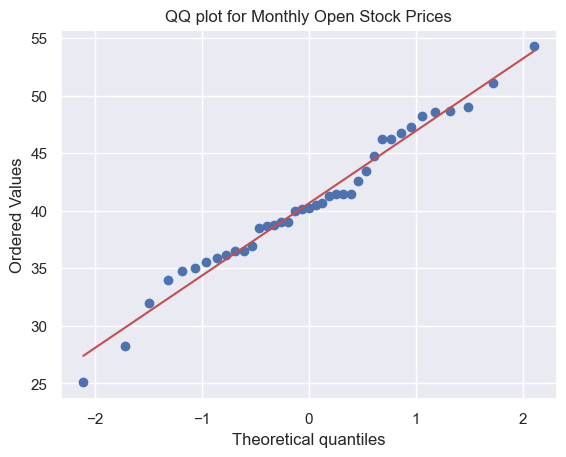

In [171]:
scipy.stats.probplot(df.open, plot=pylab)
plt.title('QQ plot for Monthly Open Stock Prices')
plt.show()

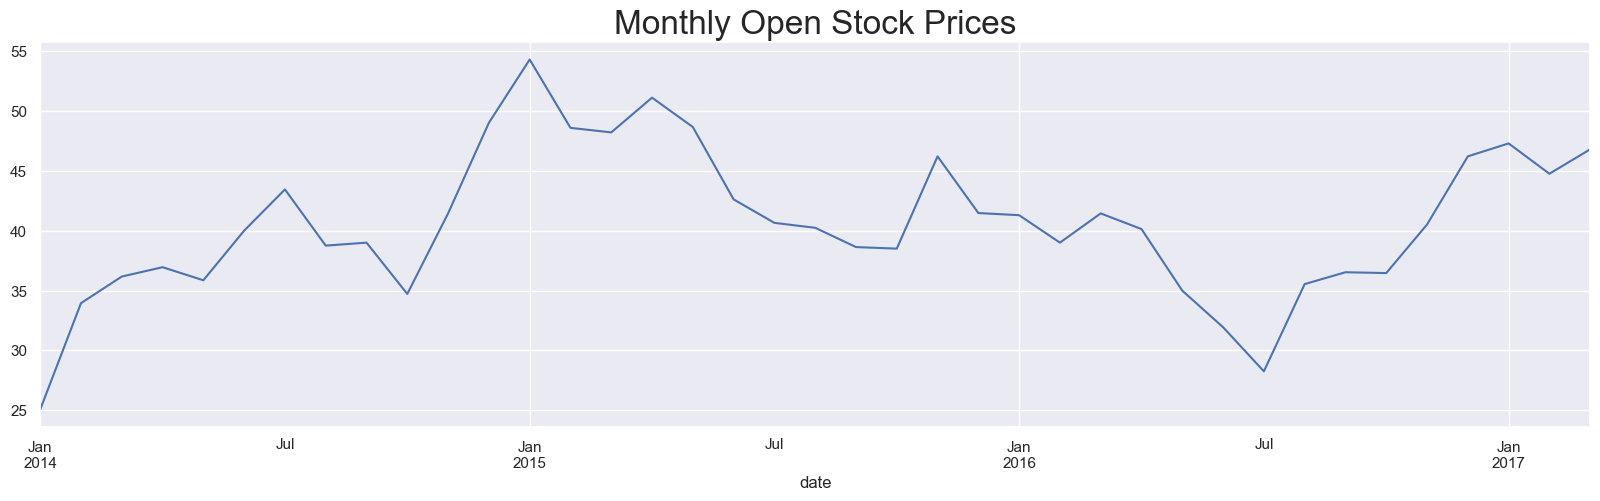

In [169]:
df.open.plot(figsize=(20,5))
plt.title('Monthly Open Stock Prices', size = 24)
plt.show()

In [197]:
df.value_counts()

symbol  open   high     low     close  volume  
AAL     25.07  25.8200  25.060  25.36  8998943     1
        46.20  46.8200  46.200  46.47  6189311     1
        41.29  41.3501  40.300  40.91  12037151    1
        41.44  42.0200  41.060  41.83  7885768     1
               42.0958  41.430  42.00  8446445     1
        41.47  43.3000  41.300  43.26  8912859     1
        42.61  44.3800  42.090  44.18  21917072    1
        43.44  43.9000  43.050  43.86  9165112     1
        44.75  45.0000  43.910  44.05  7955513     1
        46.20  47.0900  45.660  45.75  7435186     1
        40.51  40.8500  39.565  39.80  9028663     1
        46.79  48.1350  46.700  47.09  8278935     1
        47.28  47.3400  46.135  46.30  6737752     1
        48.20  48.5700  47.850  48.31  11482901    1
        48.58  48.9300  46.210  48.72  22413054    1
        48.65  49.8300  48.510  49.39  8084568     1
        49.00  49.4700  47.360  47.88  15151440    1
        51.10  51.3800  50.110  50.44  15191509    

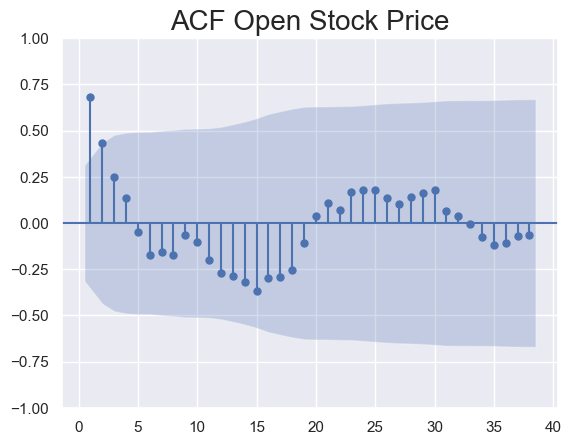

In [213]:
sgt.plot_acf(df.open, lags = 38, zero = False)
plt.title('ACF Open Stock Price', size = 20)
plt.show()

I had 39 months, zero = False meaning 38 lags

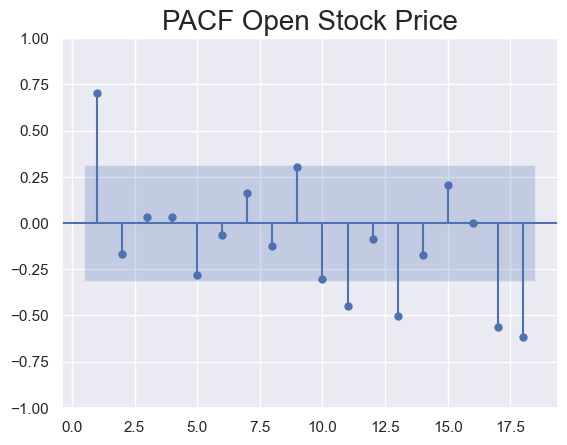

In [226]:
sgt.plot_pacf(df.open, lags = 18, zero = False, method = ('ols'))
plt.title('PACF Open Stock Price', size = 20)
plt.show()

In [228]:
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(df['close'], order=(1,0,0)).fit()
print("AR AIC:", ar_model.aic)
ma_model = ARIMA(df['close'], order=(0,0,1)).fit()
print("MA AIC:", ma_model.aic)
arma_model = ARIMA(df['close'], order=(1,0,1)).fit()
print("ARMA AIC:", arma_model.aic)

AR AIC: 224.0681613315918
MA AIC: 235.33053052999838
ARMA AIC: 225.47151341370852


Choose the value with the lowest AIC value

In [231]:
from scipy.stats.distributions import chi2
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [237]:
model_ar_1 = SARIMAX(df.open, order=(1, 0, 0))
print(model_ar_1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                   39
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -112.382
Date:                Sun, 16 Feb 2025   AIC                            228.765
Time:                        13:22:14   BIC                            232.092
Sample:                    01-31-2014   HQIC                           229.959
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9943      0.014     70.793      0.000       0.967       1.022
sigma2        16.6189      4.757      3.493      0.000       7.295      25.943
Ljung-Box (L1) (Q):                   0.45   Jarque-

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [241]:
model_ar_3 = SARIMAX(df.open, order = (3, 0, 0))
print(model_ar_3.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                   39
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -111.871
Date:                Sun, 16 Feb 2025   AIC                            231.741
Time:                        13:28:21   BIC                            238.395
Sample:                    01-31-2014   HQIC                           234.129
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1081      0.171      6.496      0.000       0.774       1.442
ar.L2         -0.2513      0.299     -0.840      0.401      -0.838       0.335
ar.L3          0.1379      0.213      0.649      0.5

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [243]:
def LLR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [245]:
LLR_test(model_ar_1, model_ar_3, DF = 2)

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


0.599

In [247]:
model_ar_5 = SARIMAX(df.open, order = (5, 0, 0))
print(model_ar_5.fit().summary())

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                   39
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -110.830
Date:                Sun, 16 Feb 2025   AIC                            233.659
Time:                        13:33:46   BIC                            243.641
Sample:                    01-31-2014   HQIC                           237.241
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1196      0.169      6.634      0.000       0.789       1.450
ar.L2         -0.2240      0.278     -0.806      0.420      -0.769       0.321
ar.L3         -0.0257      0.285     -0.090      0.9

In [249]:
LLR_test(model_ar_1, model_ar_5)

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


0.078

In [251]:
sts.adfuller(df.open)

(-2.447279796725739,
 0.12883408209136643,
 1,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 156.71592112963572)

## Returns

In [253]:
df['returns'] = df.open.pct_change(1).mul(100)
df = df.iloc[1:]

In [255]:
sts.adfuller(df.returns)

(-6.318107169548327,
 3.114219183915853e-08,
 0,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 202.64527040795568)

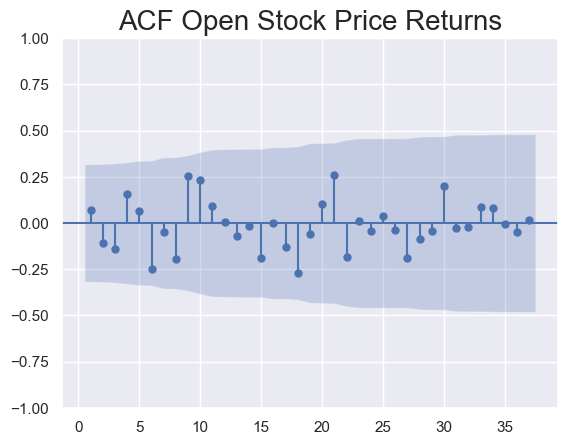

In [263]:
sgt.plot_acf(df.returns, lags = 37, zero = False)
plt.title('ACF Open Stock Price Returns', size = 20)
plt.show()

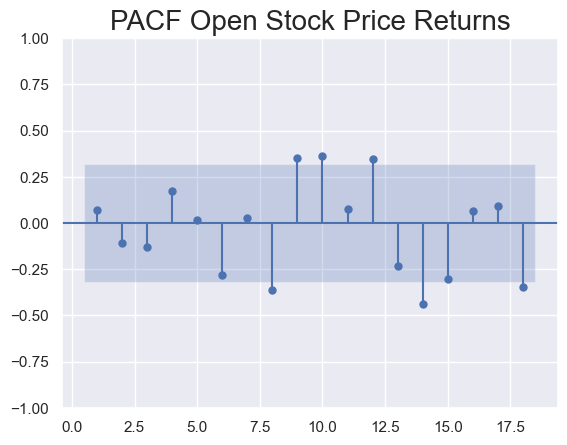

In [267]:
sgt.plot_pacf(df.returns, lags = 18, zero = False, method = ('ols'))
plt.title('PACF Open Stock Price Returns', size = 20)
plt.show()

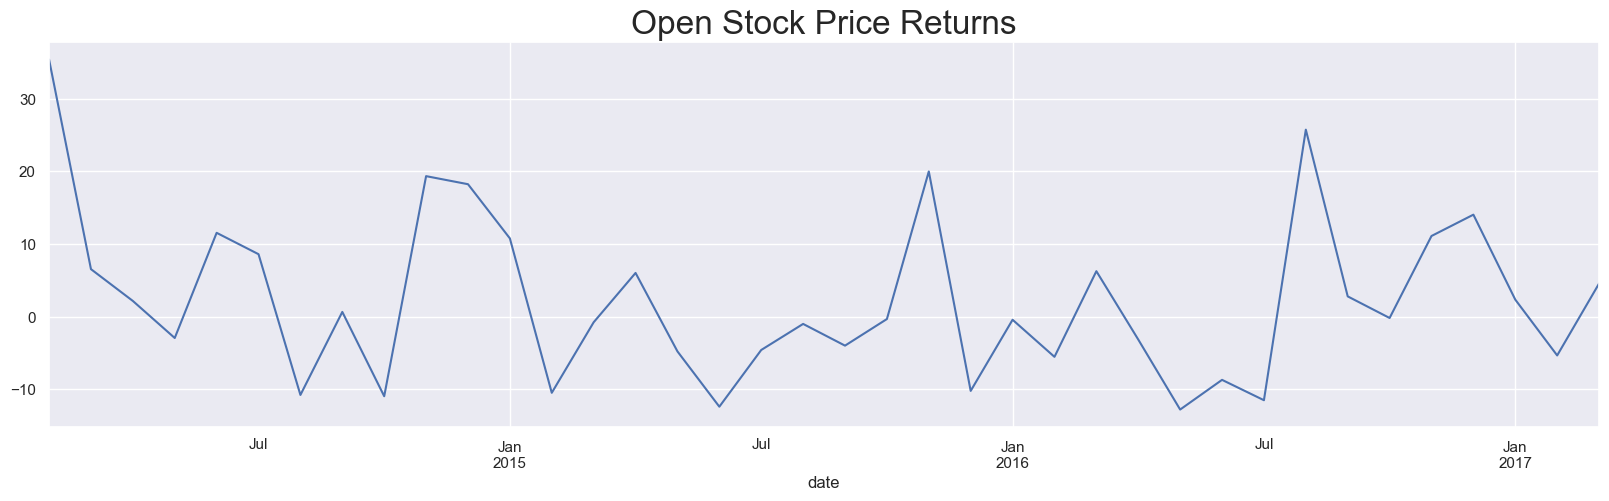

In [322]:
df.returns.plot(figsize = (20, 5))
plt.title('Open Stock Price Returns', size = 24)
plt.show()

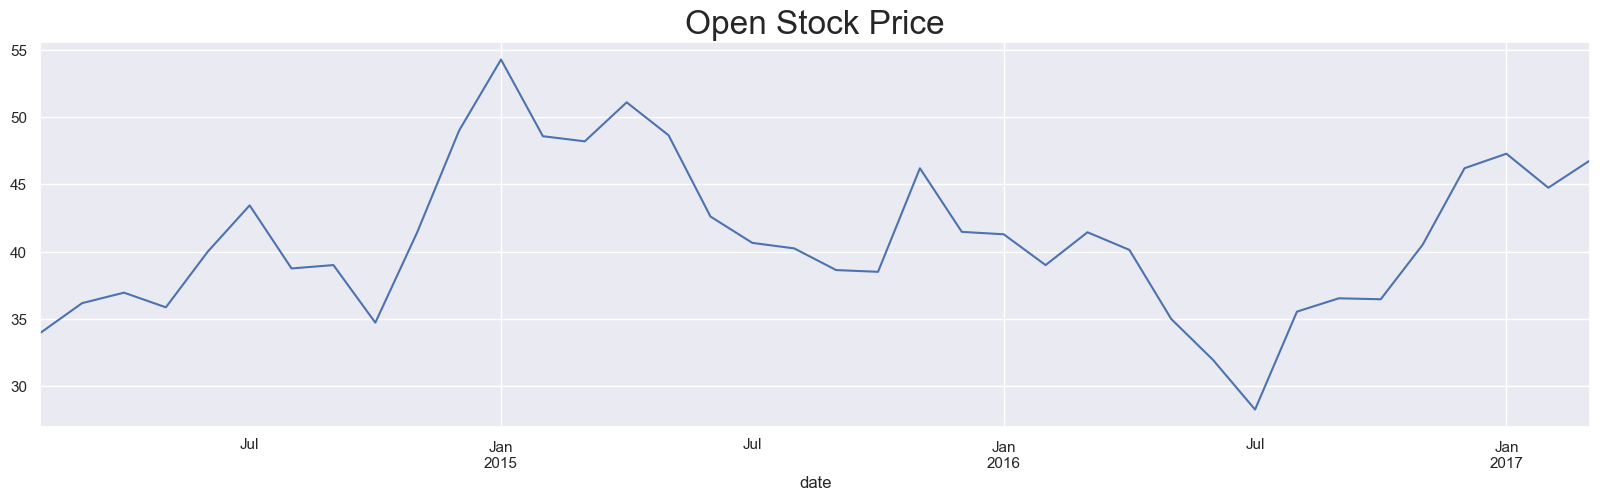

In [320]:
df.open.plot(figsize = (20, 5))
plt.title('Open Stock Price', size = 24)
plt.show()

Returns show percentage changes, while Open prices show absolute values. Different scales and patterns are expected.

In [276]:
model_ret_ar_1 = SARIMAX(df.returns, order = (1, 0, 0))
print(model_ret_ar_1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -146.229
Date:                Sun, 16 Feb 2025   AIC                            296.458
Time:                        13:48:52   BIC                            299.733
Sample:                    02-28-2014   HQIC                           297.623
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1160      0.195      0.594      0.552      -0.267       0.499
sigma2       128.7683     23.212      5.547      0.000      83.273     174.264
Ljung-Box (L1) (Q):                   0.04   Jarque-

In [280]:
model_ret_ar_8 = SARIMAX(df.returns, order=(8, 0, 0))
print(model_ret_ar_8.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                   38
Model:               SARIMAX(8, 0, 0)   Log Likelihood                -141.621
Date:                Sun, 16 Feb 2025   AIC                            301.242
Time:                        13:52:30   BIC                            315.980
Sample:                    02-28-2014   HQIC                           306.485
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1231      0.179      0.687      0.492      -0.228       0.474
ar.L2         -0.1392      0.253     -0.550      0.582      -0.635       0.357
ar.L3         -0.1953      0.206     -0.950      0.3

In [282]:
model_ret_ar_12 = SARIMAX(df.returns, order = (12, 0, 0))
print(model_ret_ar_12.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                   38
Model:              SARIMAX(12, 0, 0)   Log Likelihood                -136.329
Date:                Sun, 16 Feb 2025   AIC                            298.658
Time:                        13:53:39   BIC                            319.946
Sample:                    02-28-2014   HQIC                           306.232
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1016      0.262      0.388      0.698      -0.412       0.615
ar.L2         -0.1164      0.267     -0.436      0.663      -0.640       0.407
ar.L3         -0.1463      0.191     -0.766      0.4

In [284]:
LLR_test(model_ret_ar_1, model_ret_ar_8)

0.002

In [286]:
LLR_test(model_ret_ar_8, model_ret_ar_12)

0.001

In [290]:
model_ret_ar_8.fit().aic

301.2416273835974

In [292]:
model_ret_ar_12.fit().aic

298.65764485720445

In [294]:
model_ret_ar_8.fit().llf

-141.6208136917987

In [296]:
model_ret_ar_12.fit().llf

-136.32882242860222

Based on these results aic low is in model with 12 lags, and llf is higher for model with 8 lags, lets go with model that has 12 lags

In [300]:
df['residuals_open'] = model_ret_ar_12.fit().resid

C:\Users\khali\AppData\Local\Temp\ipykernel_8472\1233136279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals_open'] = model_ret_ar_12.fit().resid


In [304]:
df.residuals_open.mean()

0.8967395940318715

In [306]:
df.residuals_open.var()

85.31441967450141

In [310]:
math.sqrt(df.residuals_open.var())

9.236580518487424

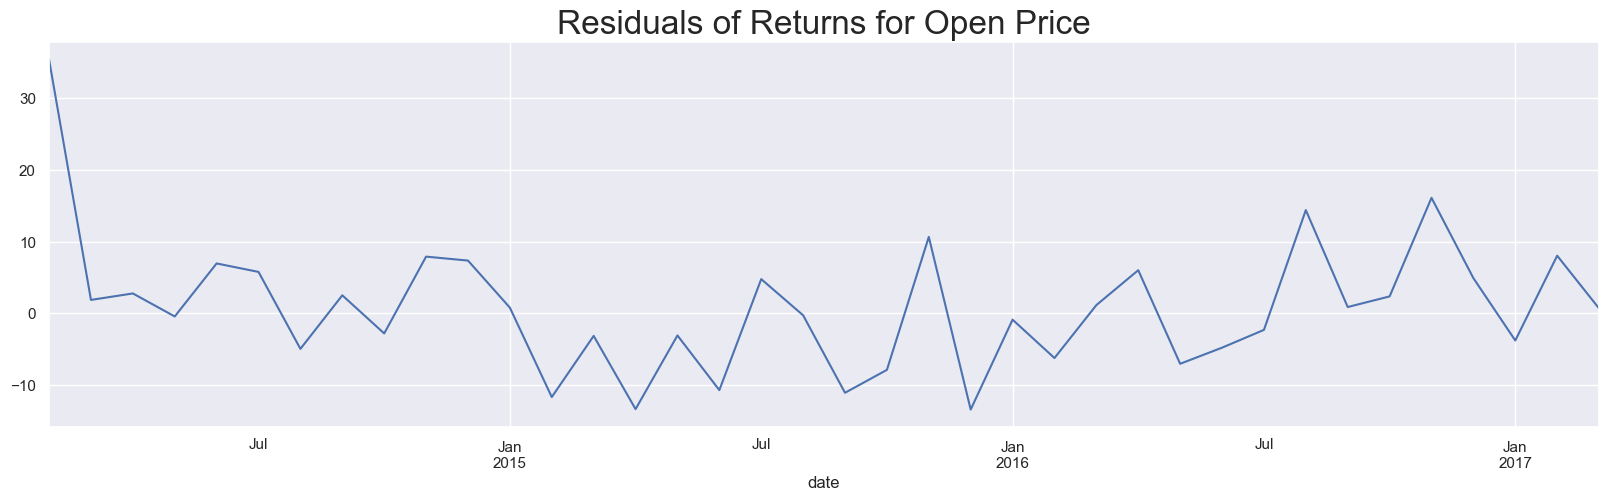

In [318]:
df.residuals_open.plot(figsize = (20, 5))
plt.title('Residuals of Returns for Open Price', size = 24)
plt.show()

As you can see here is a trend not a white noise which means no trends but purely random. try different model.

In [333]:
sts.adfuller(df.residuals_open)

(-7.254834460366016,
 1.7417833159759983e-10,
 0,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 191.71171819437927)

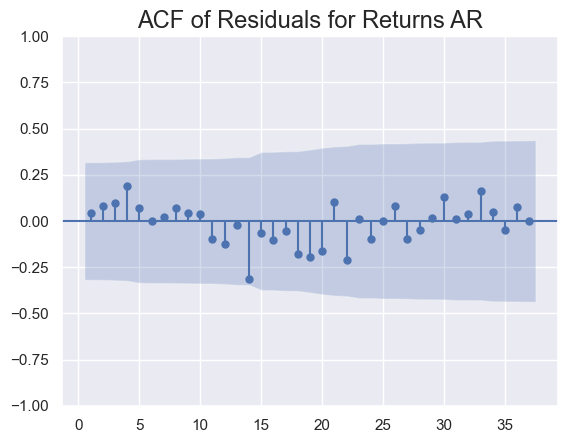

In [458]:
sgt.plot_acf(df.residuals_open, zero = False, lags = 37)
plt.title('ACF of Residuals for Returns AR', size = 17)
plt.show()

This indicates the characteristics of a white noise

In [343]:
forecast = model_ret_ar_12.fit().forecast(steps = 5)
print(forecast)

2017-04-30   -13.915153
2017-05-31    -4.819590
2017-06-30     5.425897
2017-07-31     1.365681
2017-08-31     1.415454
Freq: ME, Name: predicted_mean, dtype: float64


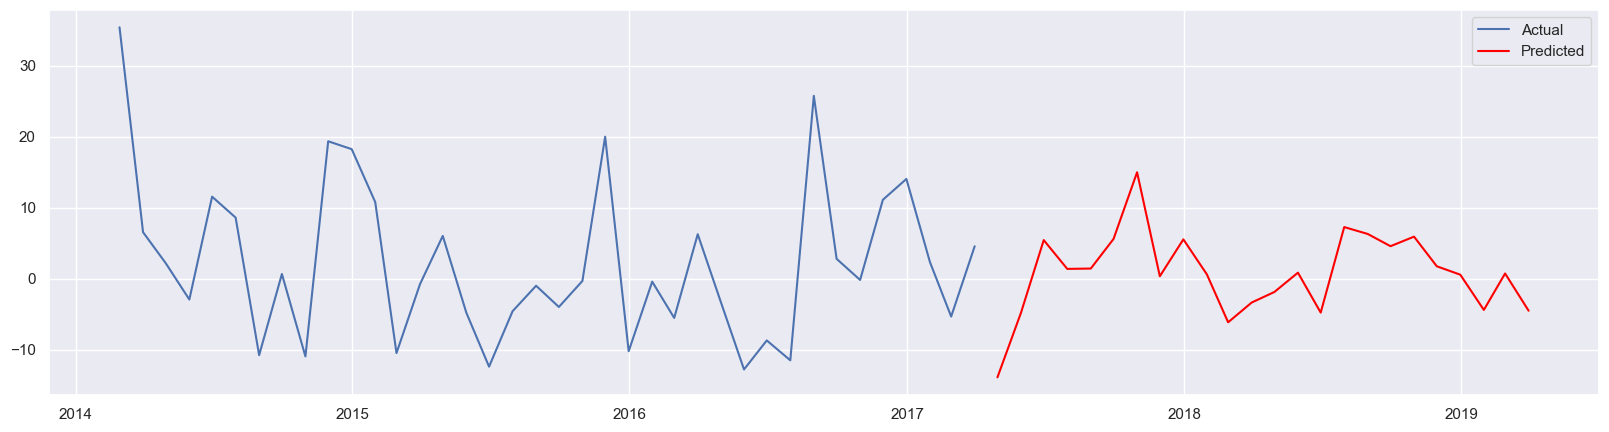

In [377]:
pred = model_ret_ar_12.fit().forecast(steps=24)
plt.figure(figsize = (20, 5))
plt.plot(df['returns'], label='Actual')
plt.plot(pred, label='Predicted', color='red')
plt.legend()
plt.show()

In [359]:
# Assuming you have the forecasted returns (pred)
pred_actual = df['open'].iloc[-1] * (1 + pred/100).cumprod()

In [363]:
pred_actual

## ARMA

In [381]:
model_ret_ar1_ma1 = SARIMAX(df.returns, order = (1, 0, 1))
print(model_ret_ar1_ma1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                   38
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -146.182
Date:                Sun, 16 Feb 2025   AIC                            298.365
Time:                        15:41:54   BIC                            303.277
Sample:                    02-28-2014   HQIC                           300.112
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0856      2.053     -0.042      0.967      -4.110       3.939
ma.L1          0.2139      2.024      0.106      0.916      -3.753       4.181
sigma2       128.4410     23.473      5.472      0.0

In [389]:
temp_ar1 = SARIMAX(df.returns, order=(1, 0, 0))
temp_ma1 = SARIMAX(df.returns, order=(0, 0, 1))

In [391]:
print(f'ARMA vs AR: {LLR_test(temp_ar1, model_ret_ar1_ma1)}')
print(f'ARMA vs MA: {LLR_test(temp_ma1, model_ret_ar1_ma1)}')

ARMA vs AR: 0.76
ARMA vs MA: 0.899


ACF for MA and PACF for AR, based on graph results we can select the number of lags

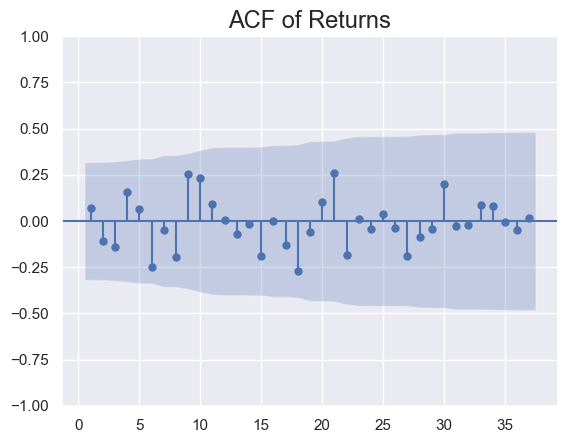

In [396]:
sgt.plot_acf(df.returns, zero = False, lags = 37)
plt.title('ACF for Returns', size = 17)
plt.show()

ACF plot shows no correlation lags, so you can select 0 for ARMA is MA part, or you can just use 1 as a practice

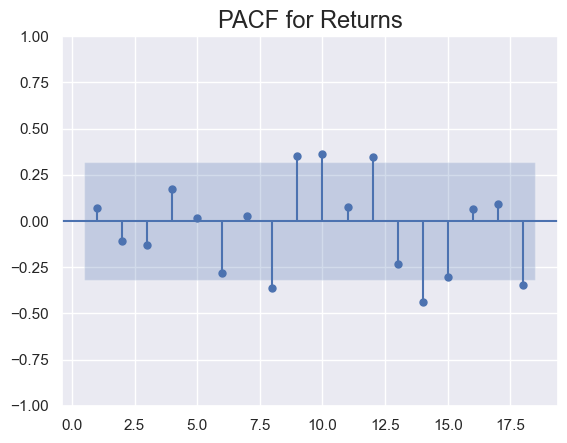

In [398]:
sgt.plot_pacf(df.returns, zero = False, lags = 18, method = ('ols'))
plt.title('PACF for Returns', size = 17)
plt.show()

Here I would like to go for 12 lags

In [412]:
model_ret_ar_12_ma_1 = SARIMAX(df.returns, order = (12, 0, 1))
print(model_ret_ar_12_ma_1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                   38
Model:              SARIMAX(12, 0, 1)   Log Likelihood                -135.938
Date:                Sun, 16 Feb 2025   AIC                            299.876
Time:                        16:29:13   BIC                            322.802
Sample:                    02-28-2014   HQIC                           308.033
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1831      0.649     -0.282      0.778      -1.455       1.089
ar.L2         -0.0938      0.246     -0.382      0.703      -0.576       0.388
ar.L3         -0.1534      0.170     -0.902      0.3

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [414]:
LLR_test(model_ret_ar_12, model_ret_ar_12_ma_1)

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.377

In [422]:
df['residuals_ar_12_ma_1'] = model_ret_ar_12_ma_1.fit().resid

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\khali\AppData\Local\Temp\ipykernel_8472\506563736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals_ar_12_ma_1'] = model_ret_ar_12_ma_1.fit().resid


In [432]:
df.residuals_ar_12_ma_1.mean()

0.9474515474694851

In [434]:
df.residuals_ar_12_ma_1.var()

83.93194995565251

In [438]:
math.sqrt(df.residuals_ar_12_ma_1.var())

9.161438203451056

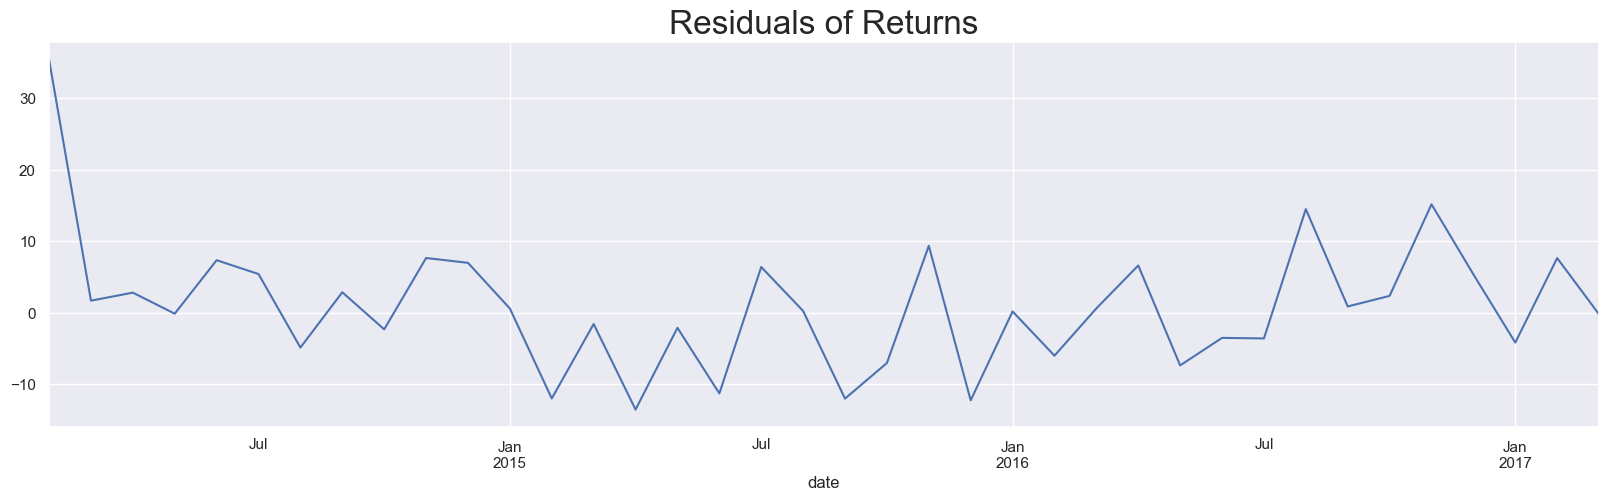

In [444]:
df.residuals_ar_12_ma_1.plot(figsize = (20, 5))
plt.title('Residuals of Returns', size = 24)
plt.show()

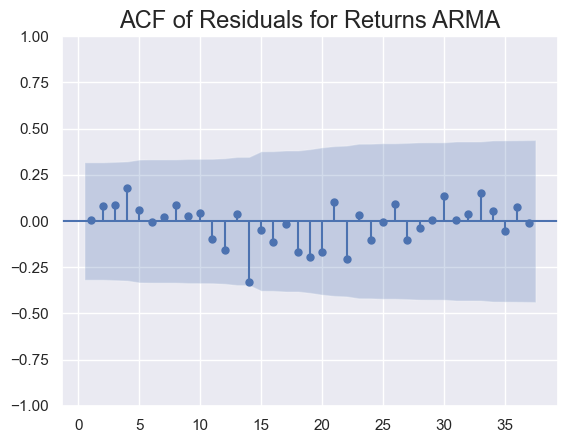

In [456]:
sgt.plot_acf(df.residuals_ar_12_ma_1, zero = False, lags = 37)
plt.title('ACF of Residuals for Returns ARMA', size = 17)
plt.show()

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


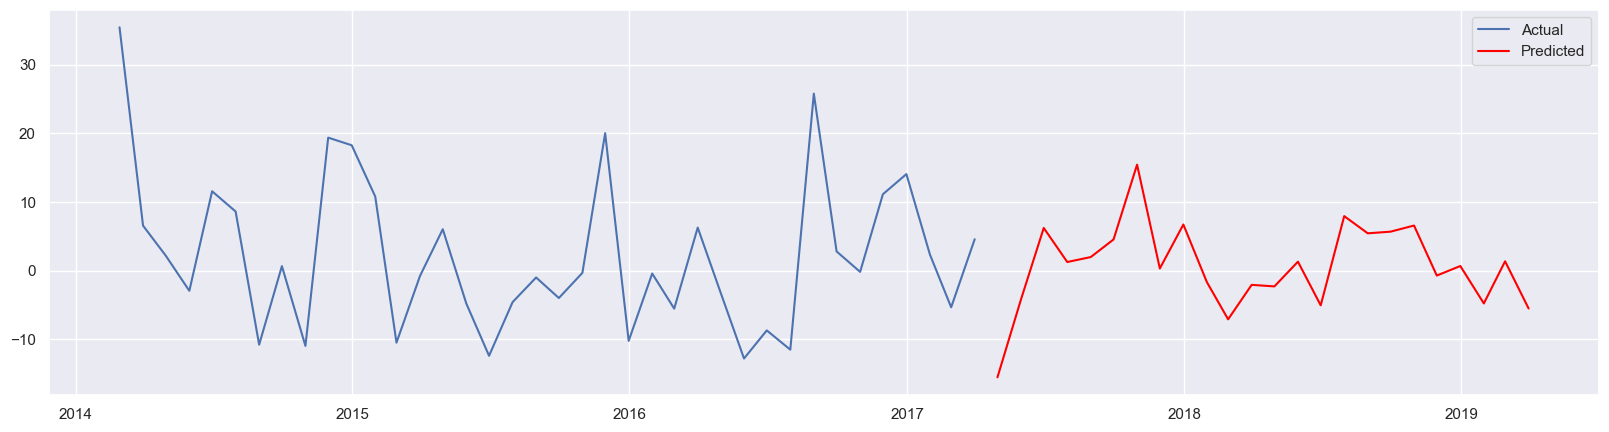

In [450]:
pred = model_ret_ar_12_ma_1.fit().forecast(steps=24)
plt.figure(figsize = (20, 5))
plt.plot(df['returns'], label='Actual')
plt.plot(pred, label='Predicted', color='red')
plt.legend()
plt.show()